# mehmetfatihdata

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
students = pd.read_csv("StudentsPerformance.csv")
students.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


# Q1:
Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

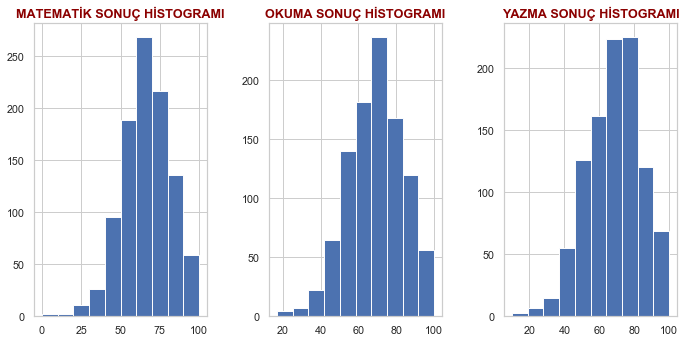

In [3]:

plt.rcParams["figure.dpi"]=70
plt.rcParams["figure.figsize"]=(10,5)

plt.subplot(1,3,1)
plt.title("MATEMATİK SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(students["math score"])

plt.subplot(1,3,2)
plt.title("OKUMA SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(students["reading score"])

plt.subplot(1,3,3)
plt.title("YAZMA SONUÇ HİSTOGRAMI",fontdict=baslik_font)
plt.hist(students["writing score"])

plt.tight_layout()
plt.show()

# Q2:
Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [4]:
students["total_score"]=(students["math score"]+students["reading score"]+students["writing score"])/3

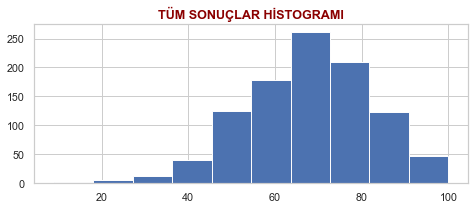

In [5]:
plt.figure(figsize=(8,3))

plt.title("TÜM SONUÇLAR HİSTOGRAMI",fontdict=baslik_font)
plt.hist(students["total_score"])
plt.show()

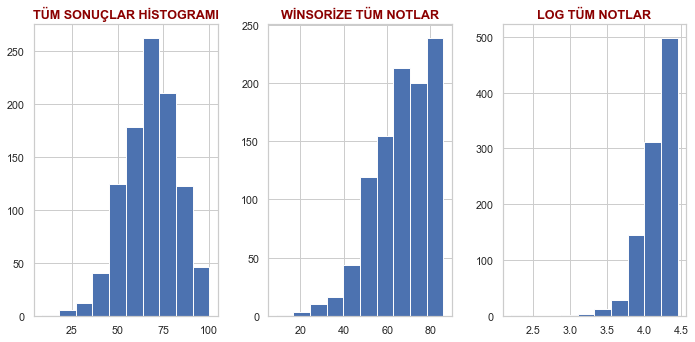

In [6]:
plt.subplot(1,3,1)
plt.title("TÜM SONUÇLAR HİSTOGRAMI",fontdict=baslik_font)
plt.hist(students["total_score"])

plt.subplot(1,3,2)
plt.title("WİNSORİZE TÜM NOTLAR",fontdict=baslik_font)
winsorize_total_score=winsorize(students["total_score"],(0,0.10))
plt.hist(winsorize_total_score)

plt.subplot(1,3,3)
plt.title("LOG TÜM NOTLAR",fontdict=baslik_font)
plt.hist(np.log(winsorize_total_score))

plt.tight_layout()
plt.show()

# Q3:
Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

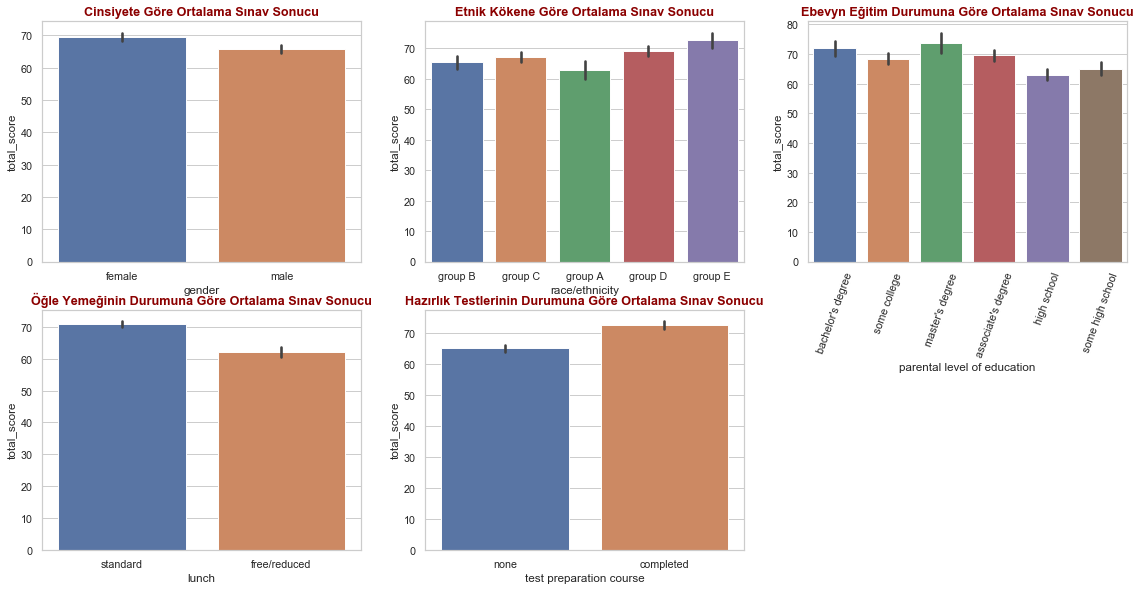

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(students["gender"], students["total_score"])
plt.title("Cinsiyete Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(2,3,2)
sns.barplot(students["race/ethnicity"], students["total_score"])
plt.title("Etnik Kökene Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(2,3,3)
chart=sns.barplot(students["parental level of education"], students["total_score"])
plt.title("Ebevyn Eğitim Durumuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font )
chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

plt.subplot(2,3,4)
sns.barplot(students["lunch"], students["total_score"])
plt.title("Öğle Yemeğinin Durumuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font )

plt.subplot(2,3,5)
sns.barplot(students["test preparation course"], students["total_score"])
plt.title("Hazırlık Testlerinin Durumuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font )
plt.show()

Hedef değişken Total_Score tüm değişkenler ile korelasyona sahiptir. Ancak bazı değişkenler içerisindeki gruplar arasındaki fark az olduğundan birleştirilebilir. 

BİTTİ.